In [1]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk import ngrams
from nltk import word_tokenize
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import PorterStemmer 
from sklearn import metrics

In [2]:
# Reading the data set

df = pd.read_csv('/Users/sravankumar/Downloads/Emotion-Detector-master 2/ISEAR.csv',header=None)


In [3]:
df.head()

,0,1,2
0,joy,On days when I feel close to my partner and ot...,NaN
1,fear,Every time I imagine that someone I love or I ...,NaN
2,anger,When I had been obviously unjustly treated and...,NaN
3,sadness,When I think about the short time that we live...,NaN
4,disgust,At a gathering I found myself involuntarily si...,NaN


In [4]:
# Removing the null values from the data set and specifying the column names
col = [0,1]
new_df = df[col]
new_df = new_df[pd.notnull(df[1])]
new_df.columns = ['Emotion','Text']
new_df.head()

,Emotion,Text
0,joy,On days when I feel close to my partner and ot...
1,fear,Every time I imagine that someone I love or I ...
2,anger,When I had been obviously unjustly treated and...
3,sadness,When I think about the short time that we live...
4,disgust,At a gathering I found myself involuntarily si...


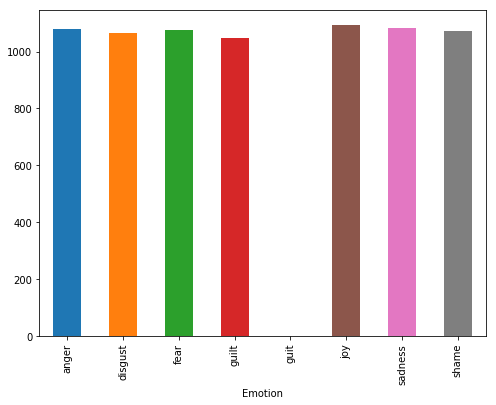

In [6]:
#To get the plot of the emotion distribution in data
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
new_df.groupby('Emotion').Text.count().plot.bar(ylim=0)
plt.show()

In [48]:
# Verifying the data
#new_df['Text']
#new_df['Emotion']

In [7]:
# Preprocessing the data set
# Performing Tokenization,removing new lines,punctuations
def getTokenizedList(input_df):
    tokenizedList=[]
    for i in range(0,len(input_df)):
        curText=input_df[1].iloc[i]
        curText=curText.replace('\n','')
        curTokenized=word_tokenize(curText)
        tokenizedList.append(curTokenized)
    #print(tokenizedList)
    tokenziedListWithoutPunct=[] 
    punctList=list(string.punctuation)
    for i in range(0,len(tokenizedList)):
        curList=tokenizedList[i]
        newList=[] #list without stopwords
        for word in curList:
            if (word.lower() not in punctList):
                newList.append(word.lower())
        tokenziedListWithoutPunct.append(newList)

    #print(tokenziedListWithoutPunct)
#Stemming
    mystemmer=PorterStemmer()
    tokenziedStemmed=[]
    for i in range(0,len(tokenziedListWithoutPunct)):
        curList=tokenziedListWithoutPunct[i]
        newList=[] 
        for word in curList:
            newList.append(mystemmer.stem(word))
        tokenziedStemmed.append(newList)
    return tokenziedStemmed

In [50]:
# Preprocessing the sentence which we input to predict the emotion
def transformSentence(sent):
    s = []
    sent=sent.replace('\n','')
    sentTokenized=word_tokenize(sent)
    s.append(sentTokenized)
    sWithoutPunct = []
    punctList = list(string.punctuation)
    curSentList = s[0]
    newSentList = []
    for word in curSentList:
        if (word.lower() not in punctList):
            newSentList.append(word.lower())
    sWithoutPunct.append(newSentList)
    mystemmer = PorterStemmer()
    tokenziedStemmed = []
    for i in range(0,len(sWithoutPunct)):
        curList=sWithoutPunct[i]
        newList=[]
        for word in curList:
            newList.append(mystemmer.stem(word))
        tokenziedStemmed.append(newList)
    return tokenziedStemmed

In [8]:
new_df['Text']=getTokenizedList(df)
#new_df['Text']

In [9]:
#splitting the data set into Training and Testing sets
X_train, X_test, Y_train, Y_test=train_test_split(new_df['Text'],new_df['Emotion'], test_size=.3,random_state=1)
#X_train

In [11]:
#Function to pass the list to the Tfidf vectorizer
def returnPhrase(inputList):
    return inputList

In [12]:
#Extracting features for Naive Bayes
myVectorizer=TfidfVectorizer(analyzer='word',tokenizer=returnPhrase,preprocessor=returnPhrase,token_pattern=None,ngram_range=(1,3))
myVectorizer.fit(X_train)
transformedTrain=myVectorizer.transform(X_train).toarray()
transformedTest=myVectorizer.transform(X_test).toarray()

In [13]:
# Training MultinomialNB and evaluating the performance
curAlpha=0.33 #smoothing factor in NB
NBClassifier=MultinomialNB(alpha=curAlpha)
NBClassifier.fit(transformedTrain,Y_train)
myPredTest=NBClassifier.predict(transformedTest)
print('Best Acc Naive Bayes')
#print(curAlpha)
print(np.sum(myPredTest==Y_test)/len(Y_test))

Best Acc Naive Bayes
0.5835920177383592


In [14]:
# Finding Precision,recall,and f1-score for Naive Bayes

print('Metrics Classification Report : Naive Bayes')
print(metrics.classification_report(Y_test, myPredTest))

Metrics Classification Report : Naive Bayes
             precision    recall  f1-score   support

      anger       0.51      0.47      0.49       331
    disgust       0.72      0.50      0.59       324
       fear       0.62      0.70      0.66       311
      guilt       0.43      0.61      0.51       299
        joy       0.69      0.69      0.69       323
    sadness       0.68      0.60      0.64       351
      shame       0.52      0.51      0.52       316

avg / total       0.60      0.58      0.59      2255



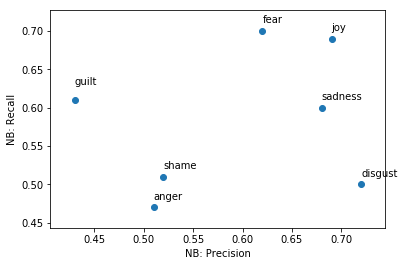

In [15]:
#Pltting a grpah for the precision and recall for each emotion - Naive bayes
def NB_metrics_classification_report_csv(rep):
    rep_data = []
    lines = rep.split('\n')
    for line in lines[2:-3]:
        r = {}
        r_data = line.split(' ')
        r_data = list(filter(None, r_data))
        r['class'] = r_data[0]
        r['precision'] = float(r_data[1])
        r['recall'] = float(r_data[2])
        r['f1-score'] = float(r_data[3])
        r['support'] = float(r_data[4])
        rep_data.append(r)
    rep_df=dataframe = pd.DataFrame.from_dict(rep_data)
    #print(dataframe)
    plt.scatter(rep_df['precision'],rep_df['recall'])
    plt.text(0.51,0.48,'anger')
    plt.text(0.72,0.51,'disgust')
    plt.text(0.62,0.71,'fear')
    plt.text(0.43,0.63,'guilt')
    plt.text(0.69,0.70,'joy')
    plt.text(0.68,0.61,'sadness')
    plt.text(0.52,0.52,'shame')
    plt.xlabel('NB: Precision')
    plt.ylabel('NB: Recall')
    plt.show()

report = metrics.classification_report(Y_test, myPredTest)
NB_metrics_classification_report_csv(report)


In [16]:
#Extracting the features for SVM
myVectorizer=TfidfVectorizer(analyzer='word',tokenizer=returnPhrase,preprocessor=returnPhrase,token_pattern=None,ngram_range=(1,3))
myVectorizer.fit(X_train)
transformedTrain=myVectorizer.transform(X_train).toarray()
transformedTest=myVectorizer.transform(X_test).toarray()

In [17]:
# Training the SVM Model and Evaluating the performance
curC=2   #cost factor in SVM
SVMClassifier=svm.LinearSVC(C=curC)
SVMClassifier.fit(transformedTrain,Y_train)
myPredTest=SVMClassifier.predict(transformedTest)
print('Best Acc SVM')
#print(curC)
print(np.sum(myPredTest==Y_test)/len(Y_test))

Best Acc SVM
0.6150776053215078


In [18]:
#Finding the precision,recall and f1-score for each emotion - SVM
print('Metrics Classification Report : SVM')
print(metrics.classification_report(Y_test, myPredTest))

Metrics Classification Report : SVM
             precision    recall  f1-score   support

      anger       0.54      0.55      0.54       331
    disgust       0.67      0.60      0.63       324
       fear       0.66      0.72      0.69       311
      guilt       0.51      0.57      0.53       299
        joy       0.71      0.71      0.71       323
    sadness       0.67      0.65      0.66       351
      shame       0.56      0.50      0.53       316

avg / total       0.62      0.62      0.61      2255



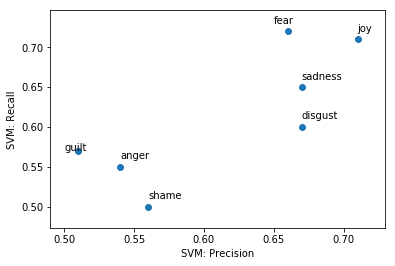

In [19]:
def SVM_metrics_classification_report_csv(rep):
    rep_data = []
    lines = rep.split('\n')
    for line in lines[2:-3]:
        r = {}
        r_data = line.split(' ')
        r_data = list(filter(None, r_data))
        r['class'] = r_data[0]
        r['precision'] = float(r_data[1])
        r['recall'] = float(r_data[2])
        r['f1-score'] = float(r_data[3])
        r['support'] = float(r_data[4])
        rep_data.append(r)
    rep_df=dataframe = pd.DataFrame.from_dict(rep_data)
    #print(dataframe)
    plt.scatter(rep_df['precision'],rep_df['recall'])
    plt.text(0.54,0.56,'anger')
    plt.text(0.67,0.61,'disgust')
    plt.text(0.65,0.73,'fear')
    plt.text(0.50,0.57,'guilt')
    plt.text(0.71,0.72,'joy')
    plt.text(0.67,0.66,'sadness')
    plt.text(0.56,0.51,'shame')
    plt.xlabel('SVM: Precision')
    plt.ylabel('SVM: Recall')
    plt.show()

report = metrics.classification_report(Y_test, myPredTest)
SVM_metrics_classification_report_csv(report)


In [20]:
#To predict the emotion of a sentence using Naive Bayes
def predictSentNB(sent):
    sentPred = NBClassifier.predict(myVectorizer.transform(transformSentence(sent)).toarray())
    return sentPred

In [21]:
#To predict the emotion of a sentence using SVM
def predictSentSVM(sent):
    sentPred = SVMClassifier.predict(myVectorizer.transform(transformSentence(sent)).toarray())
    return sentPred

In [22]:
#Input sentence 
sent = "I saw a cockroach"

In [31]:
#Printing the predicted emotion
print("Navie bayes prediction")
print(predictSentNB(sent))
print("SVM prediction")
print(predictSentSVM(sent))

Navie bayes prediction


NameError: name 'transformSentence' is not defined

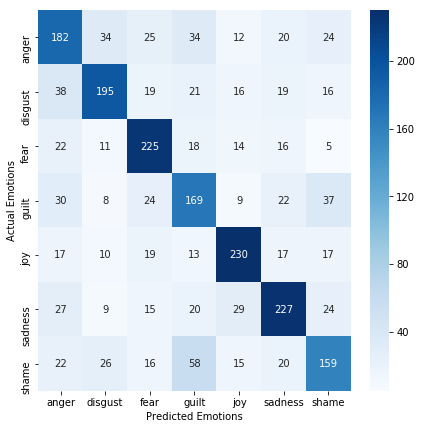

In [32]:
#printing the Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
labels = ['anger', 'disgust','fear','guilt','joy','sadness','shame']
cm = confusion_matrix(Y_test, myPredTest,labels)
#print(cm)
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot=True,fmt='d',
            xticklabels=labels, yticklabels=labels,cmap='Blues')
plt.ylabel('Actual Emotions')
plt.xlabel('Predicted Emotions')
plt.show()